In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=08ad3e7fc7026edb2c92a097e6fe57966edb0efee413aa749c7502a5e839ec22
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
url = "https://physionet.org/static/published-projects/ephnogram/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0.zip"
filename = wget.download(url)

In [ ]:
ls

'download (1).wget'
 download.wget
 ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0.zip
 sample_data/


In [ ]:
from zipfile import ZipFile


In [ ]:
with ZipFile('ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
!pip install wfdb

     |████████████████████████████████| 137 kB 24.0 MB/s 
     |████████████████████████████████| 11.2 MB 30.5 MB/s 
     |████████████████████████████████| 895 kB 41.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [19]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [1]:
# Create lists for iteration

list_str = ['01','02','03','04','05','06','07','08','09'] + list(map(str, range(10, 70)))

list_datafiles_wfdb = '/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/ECGPCG00{list_str}'
list_datafiles_raw =  '/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/npy/ECGPCG00{list_str}'
list_datafiles_800 = '/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/800/00{list_str}'

datafiles_wfdb = []
for i in range(len(list_str)):
    datafiles_str = list_datafiles_wfdb.format(list_str = list_str[i])
    datafiles_wfdb.append(datafiles_str)

datafiles_raw = []
for i in range(len(list_str)):
    datafiles_str = list_datafiles_raw.format(list_str = list_str[i])
    datafiles_raw.append(datafiles_str)
append_str = '.npy'
datafiles_raw = [sub + append_str for sub in datafiles_raw]


datafiles_800 = []
for i in range(len(list_str)):
    datafiles_str = list_datafiles_800.format(list_str = list_str[i])
    datafiles_800.append(datafiles_str)
append_str = '.npy'
datafiles_800 = [sub + append_str for sub in datafiles_800]

# datafiles = []
# for i in range(len(list_str)):
#     datafiles_str = list_datafiles.format(list_str = list_str[i])
#     datafiles.append(datafiles_str)
# append_str = '.npy'
# datafiles = [sub + append_str for sub in datafiles]

# append_str = 'drive/MyDrive/Masterarbeit/Code/two-hearts/'
# datafiles_raw_google = [append_str + sub for sub in datafiles_raw]
# datafiles_google = [append_str + sub for sub in datafiles]

In [39]:
for i in range(len(list_str)):
    signals, fields = wfdb.rdsamp(datafiles_wfdb[i], channels=[0])
    signals = np.float32(signals)
    np.save(datafiles_raw[i], signals)

TypeError: ignored

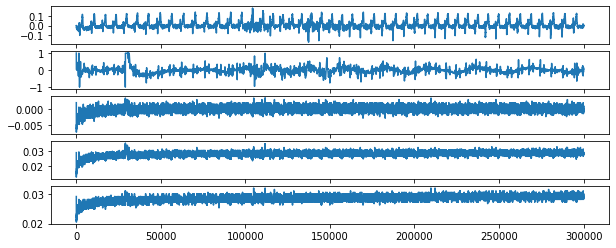

In [38]:
record = wfdb.rdrecord('/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/ECGPCG0017', sampto=300000)
wfdb.plot_items(signal=record.p_signal,figsize=(10,4), ecg_grids='all')

In [ ]:
import shutil
dir = "/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/npy"
shutil.make_archive(output_filename, 'zip', dir)

NameError: ignored

In [ ]:
import os, shutil
def make_archive(source, destination):
        base = os.path.basename(destination)
        name = base.split('.')[0]
        format = base.split('.')[1]
        archive_from = os.path.dirname(source)
        archive_to = os.path.basename(source.strip(os.sep))
        shutil.make_archive(name, format, archive_from, archive_to)
        shutil.move('%s.%s'%(name,format), destination)

make_archive('/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/npy', '/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/npy.zip')

b = os.path.getsize("/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/npy.zip")
print(b)

In [ ]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
# record = wfdb.rdrecord('/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/ECGPCG0001', sampfrom=0, sampto=10000, channels=[1])
# wfdb.plot_wfdb(record=record, title='Record 0001 from AA')

# display(record.__dict__)
# print(type(record))

ImportError: ignored

<Figure size 432x288 with 1 Axes>

{'adc_gain': [35704.6108],
 'adc_res': [0],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [-2920],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [61983],
 'comments': ['The simultaneous electrocardiogram and phonocardiogram database'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['ECGPCG0001.dat'],
 'fmt': ['16'],
 'fs': 8000,
 'init_value': [32767],
 'n_sig': 1,
 'p_signal': array([[ 0.99950676],
        [-0.00145639],
        [-0.00196053],
        ...,
        [ 0.00683385],
        [ 0.00683385],
        [ 0.00683385]]),
 'record_name': 'ECGPCG0001',
 'samps_per_frame': [1],
 'sig_len': 10000,
 'sig_name': ['PCG'],
 'skew': [None],
 'units': ['mV']}

<class 'wfdb.io.record.Record'>


In [40]:
wfdb.sampfreq("/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/ECGPCG0060")

ECG	8000
PCG	8000
PCG2	8000
AUX1	8000
AUX2	8000


In [48]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 18.0 MB/s 


In [78]:
pip install matplotlib==3.1.1


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 24, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/progress_bars.py", line 10, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/utils/logg

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load NeuroKit and other useful packages
import os
#!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]  # Bigger images

In [42]:
len(list_str)

69

In [3]:
# Set inital sampling rate
sampling_rate = 8000

# Load ECG-data as list 
data_raw = [None]*len(list_str)
for i in range(len(list_str)):
    data_raw[i] = np.load(datafiles_raw[i])

In [4]:
# Set inital sampling rate
sampling_rate = 8000

data_clean = ([None]*len(list_str))
for i in range(len(list_str)):
    data_clean[i] = nk.ecg_clean(data_raw[i], sampling_rate=sampling_rate, method="neurokit")

In [5]:
# Downsampling to 800 Hz
data_800 = [None]*len(list_str)
for i in range(len(list_str)):
    temp = data_clean[i]
    temp = temp[::10]
    data_800[i] = temp

# Save preprocessed data
for i in range(len(list_str)):
    np.save(datafiles_800[i], data_800[i])

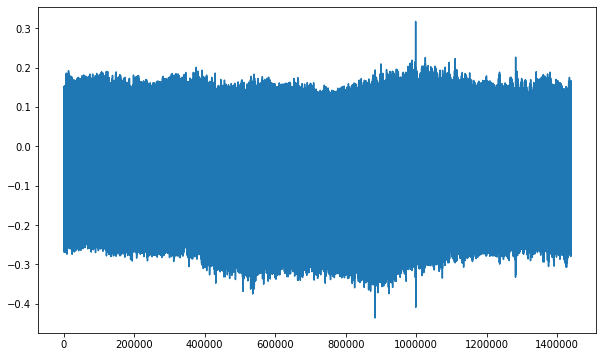

In [6]:
tem = data_800[0]
plt.plot(tem)

In [14]:
import os, shutil
def make_archive(source, destination):
        base = os.path.basename(destination)
        name = base.split('.')[0]
        format = base.split('.')[1]
        archive_from = os.path.dirname(source)
        archive_to = os.path.basename(source.strip(os.sep))
        shutil.make_archive(name, format, archive_from, archive_to)
        shutil.move('%s.%s'%(name,format), destination)

make_archive('/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/800', '/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/800.zip')

# b = os.path.getsize("/content/ephnogram-a-simultaneous-electrocardiogram-and-phonocardiogram-database-1.0.0/WFDB/800.zip")
# print(b)

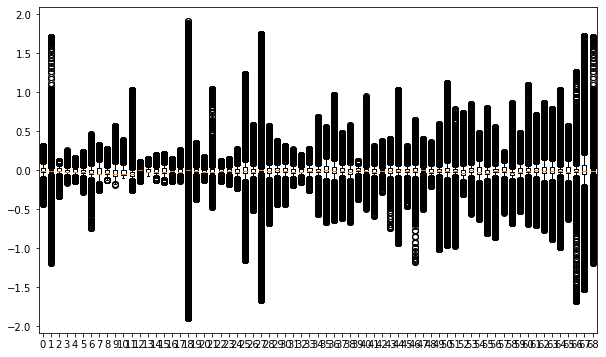

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(data_800, positions=range(len(data_800)))
plt.show()

In [9]:
# Quality check
quali = ["str"]*100
for i in range(len(list_str)): #range(60): ### wtf when > 60
    temp = nk.ecg_quality(data_800[i], rpeaks=None, sampling_rate=800, method="zhao2018", approach=None) # fuzzy & simple approach
    quali[i] = temp

# Show ECG-recordings that are high quality
highQ = []
for i, j in enumerate(quali):
    if j == 'Excellent':
        highQ.append(i)
print(highQ)

# Compare Signal quality for 1000 Hz and 100 Hz
print(nk.ecg_quality(data_800[0], rpeaks=None, sampling_rate=1000, method="zhao2018", approach=None)) # fuzzy & simple approach
# print(nk.ecg_quality(data[0], rpeaks=None, sampling_rate=100, method="zhao2018", approach=None)) # fuzzy & simple approach

KeyboardInterrupt: ignored

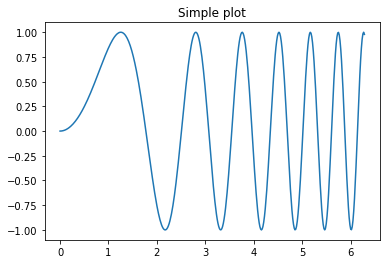

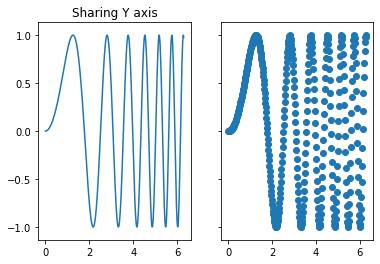

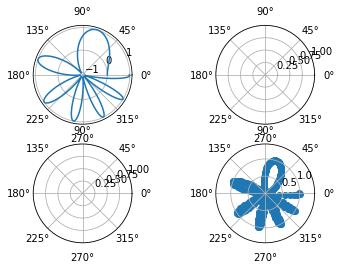

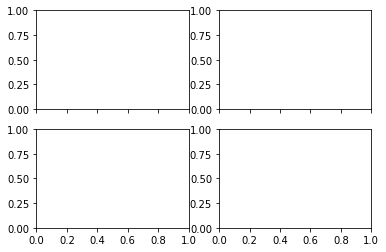

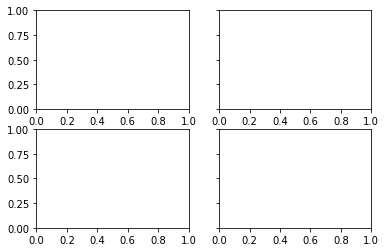

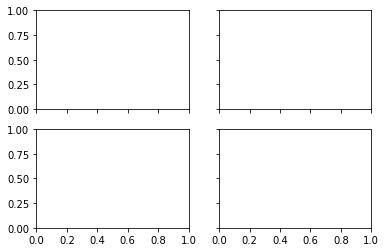

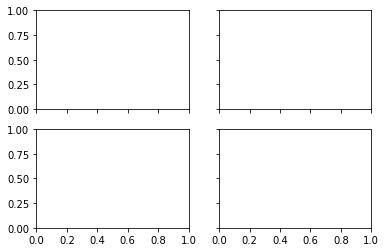

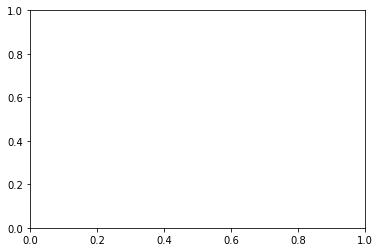

In [6]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)